# ST2195 Coursework

#### Student Number : 210421794

## Question 2 : Do older planes suffer more delays?

In [1]:
# Import and load necessary packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets

flight2005 = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/2005.csv")
flight2006 = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/2006.csv")

airports = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/airports.csv")
carriers = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/carriers.csv")
plane_data = pd.read_csv("/Users/jessicalawrence/Desktop/ST2195 Coursework Project/plane-data.csv")

In [3]:
# Combine the data from 2005 and 2006

flights = pd.concat([flight2005, flight2006])
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,NaN,0,0,0,0,0,0
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,NaN,0,30,0,32,0,0
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,NaN,0,0,0,0,0,0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,NaN,0,0,0,0,0,0


In [4]:
# Remove rows with missing values

flights.dropna(subset = ['DepTime', 'ArrTime', 'ArrDelay', 'DepDelay'], inplace = True)

In [5]:
# Re-check the null values

flights.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     13996639
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

### Assumptions made : 

- 'Year' column in flights dataset refers to be the year that the plane was used to fly by passengers
- 'year' column in plane_data dataset refers to be the year that the plane was manufactured

Therefore, age of plane is gotten by subtracting the value in 'Year' column of flight dataset with the value of 'year' column in plane_data dataset

Based on the assumptions made above, there are several cases where the age appears to be a negative value which is does not make sense, and hence we will not include them in the analysis

In [6]:
plane_data

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [7]:
# Look at the summary of plane_data dataset

plane_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [8]:
# Merge between flights and plane_data

plane_delay = pd.merge(flights, plane_data, left_on='TailNum', right_on='tailnum', how='left')
plane_delay

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,0,N935UA,Corporation,BOEING,06/29/1992,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,0,N941UA,Corporation,BOEING,10/07/1992,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,0,N342UA,Corporation,BOEING,11/28/1988,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,0,N326UA,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,0,N902UA,Corporation,BOEING,04/30/1993,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996635,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,0,N905DE,Corporation,MCDONNELL DOUGLAS CORPORATION,06/03/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
13996636,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,0,N651DL,Corporation,BOEING,07/28/1989,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1989
13996637,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,0,N143DA,Corporation,BOEING,10/16/1998,767-332,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
13996638,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,0,N904DA,Corporation,MCDONNELL DOUGLAS,05/15/1995,MD-90-30,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1995


In [9]:
plane_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13996640 entries, 0 to 13996639
Data columns (total 38 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

In [10]:
# Filtering out any invalid values in 'year' column

plane_delay = plane_delay[plane_delay['year'] != '0000']
plane_delay = plane_delay[plane_delay['year'] != 'None']

In [11]:
# Converting the manufacturing years from a string data type to an integer data type

plane_delay = plane_delay.loc[plane_delay['year'].notna()]
plane_delay['year'] = plane_delay['year'].astype(int)

In [12]:
plane_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10223636 entries, 0 to 13996639
Data columns (total 38 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

In [13]:
# Create a new column that indicates the age of plane

plane_delay['plane_age'] = plane_delay['Year'] - plane_delay['year']
plane_delay

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,plane_age
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,N935UA,Corporation,BOEING,06/29/1992,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992,13
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,N941UA,Corporation,BOEING,10/07/1992,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992,13
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,N342UA,Corporation,BOEING,11/28/1988,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,17
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,N326UA,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,17
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,N902UA,Corporation,BOEING,04/30/1993,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996635,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,N905DE,Corporation,MCDONNELL DOUGLAS CORPORATION,06/03/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992,14
13996636,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,N651DL,Corporation,BOEING,07/28/1989,757-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1989,17
13996637,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,N143DA,Corporation,BOEING,10/16/1998,767-332,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998,8
13996638,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,N904DA,Corporation,MCDONNELL DOUGLAS,05/15/1995,MD-90-30,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1995,11


In [14]:
# Group the data by age of plane and count the number of flights
flights_by_age = plane_delay.groupby('plane_age').count()['Year'].reset_index()
flights_by_age.columns = ['Age of Plane', 'Total Flights']

# Sort the dataframe by age of plane
flights_by_age = flights_by_age.sort_values(by='Age of Plane')

flights_by_age

,Age of Plane,Total Flights
0,-2,1918
1,-1,1812
2,0,201756
3,1,543867
4,2,693161
5,3,819983
6,4,942390
7,5,911887
8,6,757038
9,7,717620


In [15]:
# Querying necessary data from plane_delay DataFrame to analyse average delay and total delayed flights based on the age of plane

plane_age_mean = plane_delay[plane_delay['plane_age'].between(0,50) & (plane_delay['ArrDelay'] > 0)].groupby('plane_age').agg({"ArrDelay":["mean", "count"]}).reset_index()
plane_age_mean.columns = ["Age of Plane", "Average Arrival Delay", "Total Delayed Flights"]
plane_age_mean

,Age of Plane,Average Arrival Delay,Total Delayed Flights
0,0,31.482343,92768
1,1,30.965906,248169
2,2,29.740942,311618
3,3,30.470590,375140
4,4,30.052900,422743
5,5,29.917955,405231
6,6,30.158054,344230
7,7,30.094878,326600
8,8,30.060882,225106
9,9,30.403869,158316


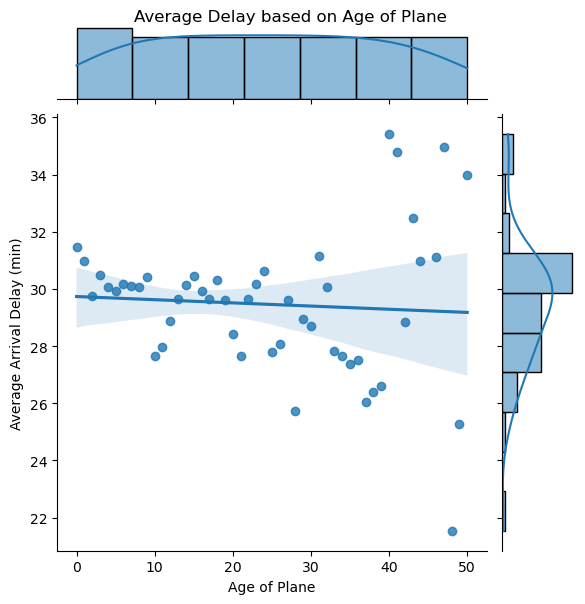

In [16]:
# Create a scatter plot for analyzing average delay based on the age of plane

plot = sns.jointplot(x = 'Age of Plane', y = 'Average Arrival Delay', data = plane_age_mean, kind = 'reg')
plot.set_axis_labels('Age of Plane', 'Average Arrival Delay (min)')
plot.fig.suptitle('Average Delay based on Age of Plane', y=1)
plt.show()

It can be seen from the data above, that the distribution of the total flights based on the age of plane is not equal. The sample size for older planes are relatively smaller than the younger planes. Therefore, it is better to check futher on the distribution of the total flights based on the age of plane.

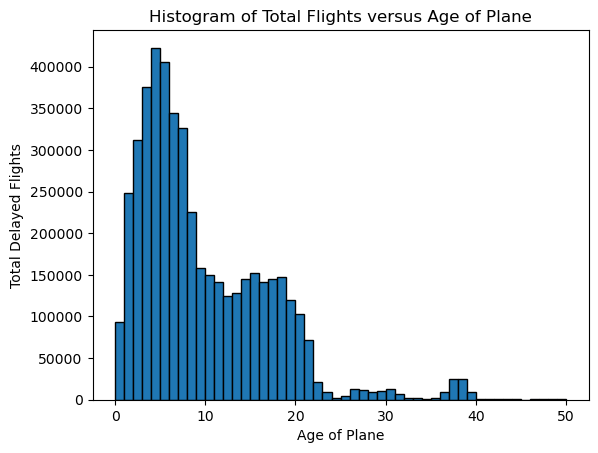

In [17]:
# Plot a histogram of total delayed flights versus age of plane

fig, ax = plt.subplots()

plt.hist(plane_age_mean['Age of Plane'], weights=plane_age_mean['Total Delayed Flights'], bins = 50, edgecolor = 'black')
plt.xlabel('Age of Plane')
plt.ylabel('Total Delayed Flights')
plt.title('Histogram of Total Flights versus Age of Plane')

plt.show()

From the histogram above, we can conclude that the sample size for age below 23 is relatively bigger. Hence, we will plot another scatter plot for age between 0 to 23 i.e. age that has bigger sample size in order to get more accurate result

In [18]:
# Observing average delay based on the age of plane between 0 and 23

plane_age_mean_2 = plane_delay[plane_delay['plane_age'].between(0,23) & (plane_delay['ArrDelay'] > 0)].groupby('plane_age').agg({"ArrDelay":["mean", "count"]}).reset_index()
plane_age_mean_2.columns = ["Age of Plane", "Average Arrival Delay", "Total Delayed Flights"]
plane_age_mean_2

,Age of Plane,Average Arrival Delay,Total Delayed Flights
0,0,31.482343,92768
1,1,30.965906,248169
2,2,29.740942,311618
3,3,30.470590,375140
4,4,30.052900,422743
5,5,29.917955,405231
6,6,30.158054,344230
7,7,30.094878,326600
8,8,30.060882,225106
9,9,30.403869,158316


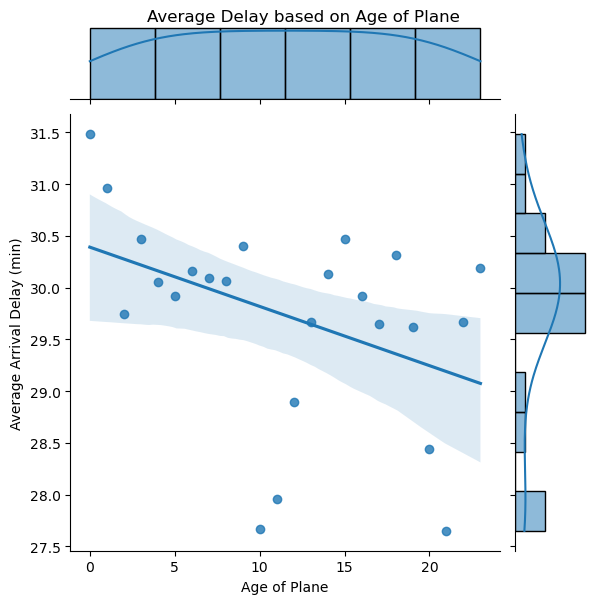

In [19]:
# Create a scatter plot for analyzing average delay based on the age of plane between 0 and 23

plot = sns.jointplot(x = 'Age of Plane', y = 'Average Arrival Delay', data = plane_age_mean_2, kind = 'reg')
plot.set_axis_labels('Age of Plane', 'Average Arrival Delay (min)')
plot.fig.suptitle('Average Delay based on Age of Plane', y=1)
plt.show()

In [20]:
# Querying necessary data from plane_delay DataFrame to analyse percentage of delayed flights based on the age of plane

plane_age_percentage = plane_delay[plane_delay["plane_age"] >= 0].groupby("plane_age").agg(
    delayed_flights=("ArrDelay", lambda x: (x > 0).sum()),  # count number of delayed flights i.e. ArrDelay>0
    total_flights=("ArrDelay", "count")  # count total number of flights
)
plane_age_percentage["% of Delayed Flights"] = (plane_age_percentage["delayed_flights"] / plane_age_percentage["total_flights"]) * 100
plane_age_percentage.rename(columns={"delayed_flights": "Total Delayed Flights", "total_flights": "Total Flights"}, inplace=True)
plane_age_percentage

,Total Delayed Flights,Total Flights,% of Delayed Flights
plane_age,,,
0,92768,201756,45.980293
1,248169,543867,45.630457
2,311618,693161,44.956078
3,375140,819983,45.749729
4,422743,942390,44.858604
5,405231,911887,44.438730
6,344230,757038,45.470637
7,326600,717620,45.511552
8,225106,485793,46.337843


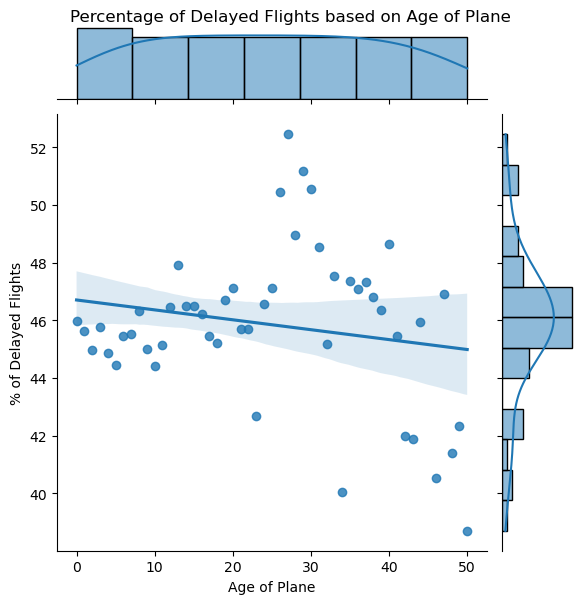

In [21]:
# Create a scatter plot for analyzing % of delayed flights based on the age of plane

plot = sns.jointplot(x = 'plane_age', y = '% of Delayed Flights', data = plane_age_percentage, kind = 'reg')
plot.set_axis_labels('Age of Plane', '% of Delayed Flights')
plot.fig.suptitle('Percentage of Delayed Flights based on Age of Plane', y=1)
plt.show()

In [22]:
# Observing percentage of delayed flights based on the age of plane between 0 and 23

plane_age_percentage_2 = plane_delay[(plane_delay["plane_age"] >= 0) & (plane_delay["plane_age"] <= 23)].groupby("plane_age").agg(
    delayed_flights=("ArrDelay", lambda x: (x > 0).sum()),  # count number of delayed flights i.e. ArrDelay>0
    total_flights=("ArrDelay", "count")  # count total number of flights
)
plane_age_percentage_2["% of Delayed Flights"] = (plane_age_percentage_2["delayed_flights"] / plane_age_percentage_2["total_flights"]) * 100
plane_age_percentage_2.rename(columns={"delayed_flights": "Total Delayed Flights", "total_flights": "Total Flights"}, inplace=True)
plane_age_percentage_2

,Total Delayed Flights,Total Flights,% of Delayed Flights
plane_age,,,
0,92768,201756,45.980293
1,248169,543867,45.630457
2,311618,693161,44.956078
3,375140,819983,45.749729
4,422743,942390,44.858604
5,405231,911887,44.438730
6,344230,757038,45.470637
7,326600,717620,45.511552
8,225106,485793,46.337843


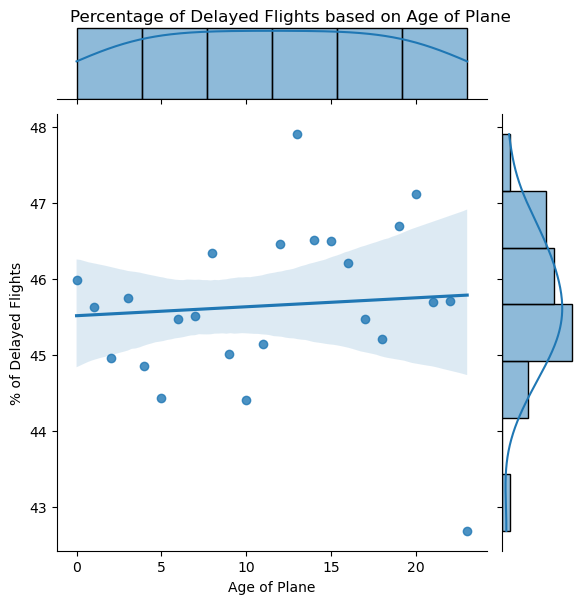

In [23]:
# Create a scatter plot for analyzing % of delayed flights based on the age of plane between 0 and 23

plot = sns.jointplot(x = 'plane_age', y = '% of Delayed Flights', data = plane_age_percentage_2, kind = 'reg')
plot.set_axis_labels('Age of Plane', '% of Delayed Flights')
plot.fig.suptitle('Percentage of Delayed Flights based on Age of Plane', y=1)
plt.show()